# Conhecendo o dataset
O dataset que aqui será analisado contém informações sobre candidatos coletadas durante um processo seletivo.

As features disponíveis são:

● employee_id: Número de identificação do funcionário;

● department: Departamento do funcionário;

● region: região onde o funcionário está empregado;

● education: Nível educacional do funcionário;

● gender: Gênero do funcionário;

● recruitment_channel: Meio pelo qual o funcionário foi contratado;

● no_ of_ trainings: Número de treinamentos que o funcionário completou em anos anteriores;

● age: Idade do funcionário;

● previous_ year_ rating: Avaliação do funcionário para o ano anterior;

● length_ of_ service: Tempo de serviço em anos;

● awards_ won?: Se ganhou algum prêmio em anos anteriores, recebe 1, do contrário 0;

● avg_ training_ score: Nota média nas avaliações de treinamento atuais;

e, por fim, a nossa target:

● is_promoted: Recomendado ou não para promoção.





# Iniciando a análise
Para analisar o dataset, faremos uso de algumas bibliotecas muito úteis para a visualização e tratamento dos dados.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [3]:
ds = pd.read_csv ("/content/drive/MyDrive/Turing/1º Projeto - TurinGucci/train.csv")
ds.set_index("employee_id", inplace = True) #A coluna employee_id definida como índice, pois ela não influencia a análise

Com a função head é possível ter uma visualização preliminar do dataset

In [4]:
ds.head().T #Optei pela matriz transposta para obter uma melhor visualização dos dados

employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1.0,1.0,1.0,2.0,1.0
age,35,30,34,39,45
previous_year_rating,5.0,5.0,3.0,1.0,3.0
length_of_service,8,4,7,10,2
awards_won?,0,0,0,0,0


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       49962 non-null  float64
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    47350 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 5.4+ MB


Por meio das informações acima, é possível notar que o dataset contém 54808 entradas. Além disso, nota-se também que há alguns dados faltantes em features como eduacation, no_of_trainings e avg_training_score. Essas ausências serão tratadas posteriormente. 
Podemos ver também que das 12 features contidas neste dataset, 5 são categóricas, ou seja, são de tipo "object", e 7 são numéricas.


#Dados categóricos


##Análise inicial
Com o auxílio do método "describe" do Pandas, é possível observar detalhadamente certos conjuntos do dataset. Usaremos este método para observar os dados categóricos.

In [6]:
ds.describe(include = ['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,10,35,3,5,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,35010,30446


A partir da tabela acima, a existência de um problema (pelo menos) torna-se nítida. Foram catalogados 5 gêneros, que aqui são interpretados como sexo. Vamos observar esta feature e as demais em detalhes.

In [7]:
print ("GENDER column unique values: ")
print(pd.Series(ds.gender.unique()), end = '\n----')

GENDER column unique values: 
0                                   f
1                                   m
2                                MALE
3                              fEMALE
4    eu sou homem hetero homossexual!
dtype: object
----

In [8]:
print ("EDUCATION column unique values: ")
print(pd.Series(ds.education.unique()), end = '\n----')

EDUCATION column unique values: 
0    Master's & above
1          Bachelor's
2                 NaN
3     Below Secondary
dtype: object
----

In [9]:
print ('DEPARTMENT column unique values: ')
print(pd.Series(ds.department.unique()), end = '\n----')

DEPARTMENT column unique values: 
0     Sales & Marketing
1            Operations
2            Technology
3             Analytics
4                   R&D
5           Procurement
6               Finance
7                    HR
8                 Legal
9    quem trouxe quenga
dtype: object
----

In [10]:
print ("REGION column unique values: ")
print(pd.Series(ds.region.unique()), end = '\n----')

REGION column unique values: 
0                 region_7
1                region_22
2                region_19
3                region_23
4                region_26
5                 region_2
6                region_20
7                region_34
8                 region_1
9                 region_4
10               region_29
11               region_31
12               region_15
13               region_14
14               region_11
15                region_5
16               region_28
17               region_17
18               region_13
19               region_16
20               region_25
21               region_10
22               region_27
23               region_30
24               region_12
25               region_21
26                region_8
27               region_32
28                region_6
29               region_33
30               region_24
31                region_3
32                region_9
33               region_18
34    casa da lu na suecia
dtype: object
----

In [11]:
print("RECRUITMENT_CHANNEL column unique values: ")
print(pd.Series(ds.recruitment_channel.unique()), end = '\n----')

RECRUITMENT_CHANNEL column unique values: 
0    sourcing
1       other
2    referred
dtype: object
----

##Corrigindo os dados categóricos

Notamos que, na feature "gender", há a mesma informação disposta de maneiras diferentes; e, em "education" há informações que se perderam; em "department", há informações que não deveriam constar nessa seção como a resposta "legal", por exemplo; em "region", também nota-se a existência de um valor que não corresponde à formatação dos demais. 
A única feature em que não há problemas, é recruitment_channel.

Com a função replace do Pandas, resolveremos a redundância das respostas na feature "gender".



In [12]:
ds['gender'].replace('f', 'female', inplace = True)
ds['gender'].replace('m', 'male', inplace = True)
ds['gender'].replace('eu sou homem hetero homossexual!', 'male', inplace = True)
ds['gender'].replace('fEMALE', 'female', inplace = True)
ds['gender'].replace('MALE', 'male', inplace = True)

In [13]:
print ("GENDER column unique values: ")
print(pd.Series(ds.gender.unique()), end = '\n----')

GENDER column unique values: 
0    female
1      male
dtype: object
----

In [14]:
print(ds['education'].isna().sum())


2409


In [15]:
len(ds[ds['department'] == 'Legal'])

1014

In [16]:
len(ds[ds['department'] == 'quem trouxe quenga'])

25

In [17]:
len(ds[ds['region'] == 'casa da lu na suecia'])

4

Observando as outras features, vemos que o número de valores incoerentes é muito pequeno, então o seu impacto nos resultados da análise é irrisório. Por esse motivo, os valores NaN em education, "quem trouxe quenga" e "casa da lu na suecia" serão apagados do dataset.
Como a quantidade de entradas com o registro "Legal" em departamento é bem maior em comparação às outras features com registros incoerentes, este termo será substituído pela moda dos departamentos, com fins de impedir uma perda grande de dados.

In [18]:
ds.drop(ds[ds['region'] == 'casa da lu na suecia'].index, inplace = True)

In [19]:
print ("REGION column unique values: ")
print (pd.Series(ds.region.unique()), end = '\n----')

REGION column unique values: 
0      region_7
1     region_22
2     region_19
3     region_23
4     region_26
5      region_2
6     region_20
7     region_34
8      region_1
9      region_4
10    region_29
11    region_31
12    region_15
13    region_14
14    region_11
15     region_5
16    region_28
17    region_17
18    region_13
19    region_16
20    region_25
21    region_10
22    region_27
23    region_30
24    region_12
25    region_21
26     region_8
27    region_32
28     region_6
29    region_33
30    region_24
31     region_3
32     region_9
33    region_18
dtype: object
----

In [20]:
ds.drop(ds[ds['department'] == 'quem trouxe quenga'].index, inplace = True)
#ds.drop(ds[ds['department'] == 'Legal'].index, inplace = True)


In [21]:
ds['department'].replace(['Legal'], [ds['department'].mode()], inplace = True)

In [22]:
print('DEPARTMENT column unique values: ')
print(pd.Series(ds.department.unique()), end = '\n----')

DEPARTMENT column unique values: 
0    Sales & Marketing
1           Operations
2           Technology
3            Analytics
4                  R&D
5          Procurement
6              Finance
7                   HR
dtype: object
----

In [23]:
#ds['education'].dropna()
ds['education'].fillna(ds['education'].mode()[0], inplace = True)

In [24]:
print(ds.education.mode())

0    Bachelor's
dtype: object


In [25]:
print(pd.Series(ds.education.unique()), end = '\n----')

0    Master's & above
1          Bachelor's
2     Below Secondary
dtype: object
----

##Analisando os dados categóricos

Agora que os dados categóricos já foram tratados, podemos observá-los com maior atenção

Text(0.5, 1.0, 'Distribuição de gêneros no dataset')

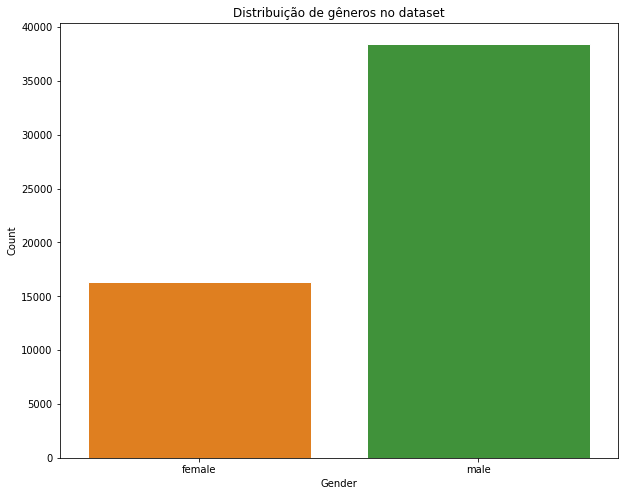

In [26]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style("whitegrid")
sns.countplot(x = 'gender', data = ds, palette = "Paired_r").set(xlabel = "Gender", ylabel = "Count")
plt.title("Distribuição de gêneros no dataset")


Como podemos notar a partir do gráfico acima, há uma quantidade muito grande de homens em comparação às mulheres. A população masculina nesta empresa é mais do que o dobro da feminina. 

Text(0.5, 1.0, 'Education degree distribuition')

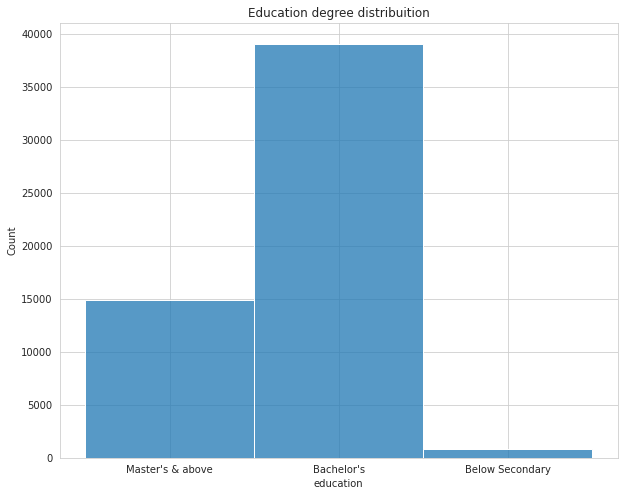

In [27]:
plt.subplots(figsize = (10, 8))
sns.set_style("whitegrid")
sns.histplot(x = ds['education']).set_title("Education degree distribuition")

Nota-se que há, na empresa analisada, uma predominância de bacharéis. Mais da metade dos funcionários da empresa tem bacharelado. Na sequência, temos uma grande quantidade de funcionários com mestrado ou formação superior a essa. Apenas uma pequena parte da população contida no dataset possui formação inferior ao ensino médio.

Text(0.5, 1.0, 'Número de funcionários por região')

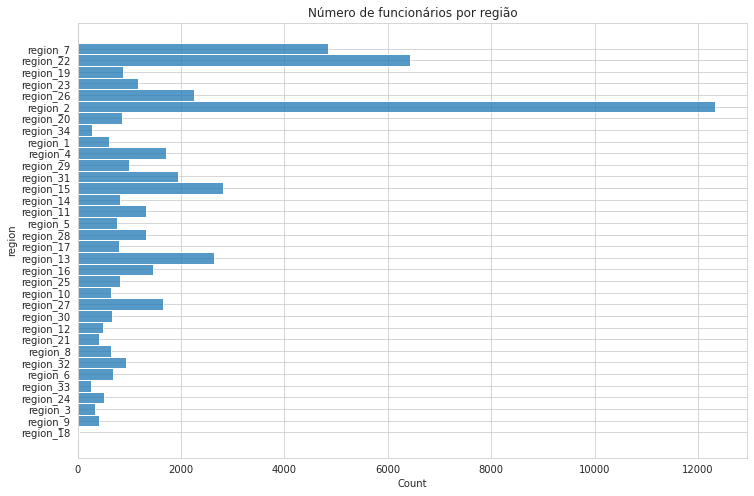

In [28]:
plt.figure(figsize = (12, 8))
sns.histplot(y = ds['region']).set_title("Número de funcionários por região")

Os funcionários estão dispersos por todas as regiões contidas no dataset, entretanto verifica-se que há uma maior concentração em algumas dessas. Nas regiões 2, 7 e 22, por exemplo, está reunido o maior contigente, mais de 22 mil funcionários são provenientes dessas regiões. Praticamente metade do quadro.

Text(0.5, 1.0, 'Distribuição de funcionários por departamento')

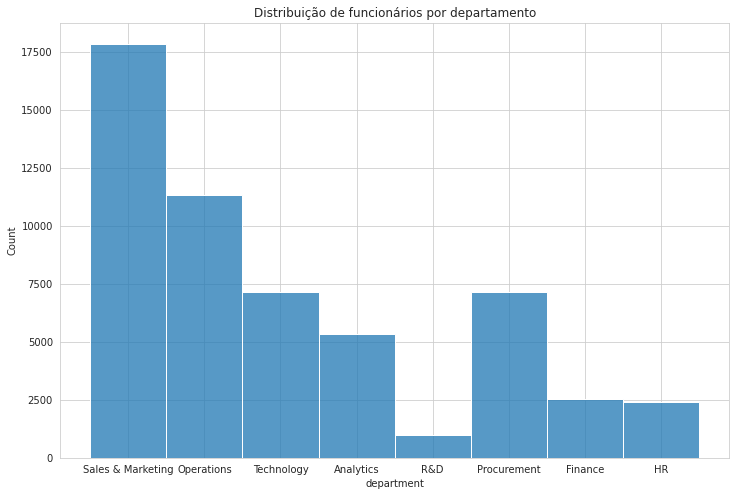

In [29]:
plt.subplots(figsize = (12, 8))
sns.histplot(x =  'department', data = ds, palette = 'Paired').set_title("Distribuição de funcionários por departamento")

Embora haja uma distribuição bem equânime entre os setores desta empresa, nota-se que em alguns desses setores concentram um número maior de funcionários que outros. Dentre esses, vemos que o setor Sales & Marketing é, sem dúvidas, o responsável pelo maior número de funcionários, seguido por Operations. Outro aspecto que chama a atenção é o número bastante reduzido de funcionários em R&D. 

Text(0.5, 1.0, 'Funcionários contratados por forma de contratação')

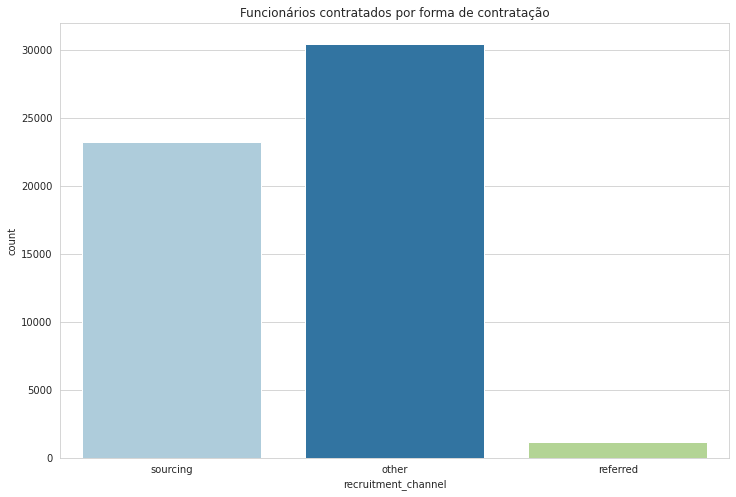

In [30]:
plt.subplots(figsize = (12,8))
sns.countplot(x = ds['recruitment_channel'], palette = "Paired").set_title("Funcionários contratados por forma de contratação")

Quando analisamos os canais pelos quais os funcionários foram contratados, vemos que um número relevante de candidatos foi contratado a partir de uma busca da própria empresa. A maioria dos candidadatos, porém, não foi convidada pela empresa para o cargo, mas o encontrou por conta própria. Há, ainda, um pequeno grupo contratado por indicação.

#Dados numéricos


##Primeira análise
Agora, para prosseguir com a nossa análise, vamos tratar os dados numéricos e observá-los em detalhes na sequência.

In [31]:
ds.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,49935.000000,54779.000000,50659.000000,54779.000000,54779.000000,47324.000000,54779.000000
mean,1.256574,273.647383,3.329339,5.866500,0.022709,63.514876,0.085087
std,0.612822,5423.996136,1.260037,4.265647,0.148977,13.492592,0.279014
min,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Apenas por esta visualização preliminar dos dados, já é possível observar que há algum erro nos dados de idade. Há um funcionário, por exemplo, com idade de -32 anos, valor impossível para esta categoria. Além disso, o maior valor de didade registrado foi de 12456, outro valor completamente inverossímil. 
As demais features serão analisadas com maiores detalhes em brvee.

In [32]:
print(pd.Series(ds.no_of_trainings.unique()), end = '\n----')

0      1.0
1      2.0
2      NaN
3      3.0
4      4.0
5      7.0
6      5.0
7      6.0
8      8.0
9     10.0
10     9.0
dtype: float64
----

In [33]:
print(ds['no_of_trainings'].isna().sum())

4844


In [34]:
print(pd.Series(ds.age.unique()), end = '\n----')

0         35
1         30
2         34
3         39
4         45
5         31
6         33
7         28
8         32
9         49
10        37
11        38
12        41
13        27
14        29
15        26
16        24
17        57
18        40
19        42
20        23
21        59
22        44
23        50
24        56
25        20
26        25
27        47
28        36
29        46
30        60
31        43
32        22
33        54
34        58
35    123456
36        48
37        53
38        55
39        51
40        52
41        21
42       -32
dtype: int64
----

In [35]:
print(pd.Series(ds.previous_year_rating.unique()), end = '\n-=-=-')

0    5.0
1    3.0
2    1.0
3    4.0
4    NaN
5    2.0
dtype: float64
-=-=-

In [36]:
print(ds['previous_year_rating'].isna().sum())

4120


In [37]:
print(pd.Series(ds.length_of_service.unique()), end = '\n----')

0      8
1      4
2      7
3     10
4      2
5      5
6      6
7      1
8      3
9     16
10     9
11    11
12    26
13    12
14    17
15    14
16    13
17    19
18    15
19    23
20    18
21    20
22    22
23    25
24    28
25    24
26    31
27    21
28    29
29    30
30    34
31    27
32    33
33    32
34    37
dtype: int64
----

In [38]:
print(pd.Series(ds.avg_training_score.unique()), end = '\n----')

0     49.0
1     60.0
2     50.0
3     73.0
4     85.0
      ... 
57    43.0
58    95.0
59    97.0
60    41.0
61    98.0
Length: 62, dtype: float64
----

In [39]:
print(ds['avg_training_score'].isna().sum())

7455


##Corrigindo e analisando dados numéricos

Para corrigir as incoerências nos valores de idade, limitaremos a idade para valores entre 0 e 100 anos.

In [40]:
ds.query('0 < age < 100', inplace = True) #Limitando as idades entre 0 e 100 anos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição etária dos funcionários')

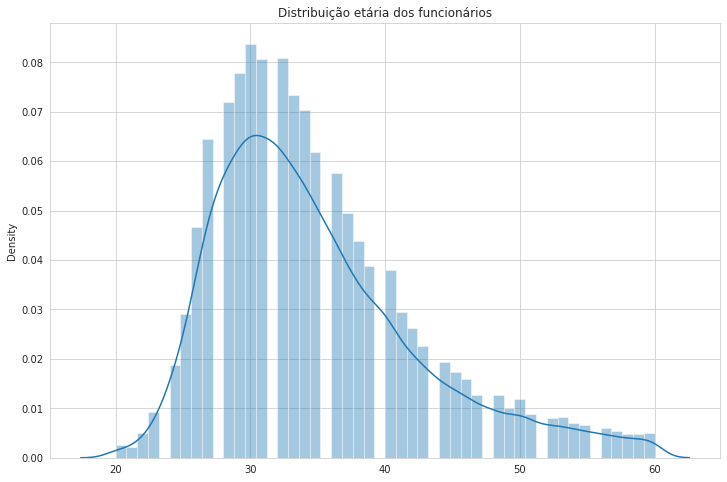

In [41]:
plt.figure(figsize = (12, 8))
sns.distplot(x = ds['age']).set_title("Distribuição etária dos funcionários")

Após corrigirmos a distorção de idades, podemos representar as idades reais em um gráfico. Por meio dele, vê-se que a maioria dos funcionários tem entre 27 e 35 anos.

Em relação aos dados faltantes encontrados em no_of_trainings, previous_year_rating e avg_training_score, há um número grande de dados faltantes em cada uma dessas features, sendo assim, para evitar um grande prejuízo para a análise, substituiremos os dados pela moda, mediana e pela média, respectivamente.

In [42]:
ds['no_of_trainings'].fillna(method = "bfill", axis = 0, inplace = True)

In [43]:
print(pd.Series(ds.no_of_trainings.unique()))

0     1.0
1     2.0
2     3.0
3     4.0
4     7.0
5     5.0
6     6.0
7     8.0
8    10.0
9     9.0
dtype: float64


Text(0.5, 1.0, 'Número de treinamentos realizado por funcionário')

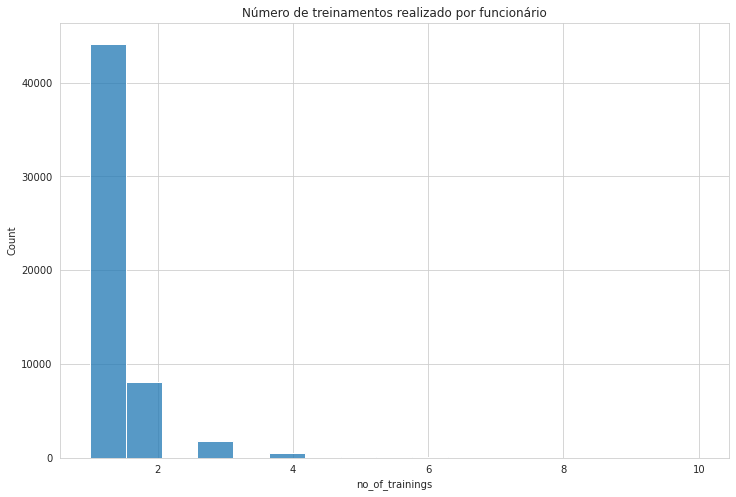

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(x = ds['no_of_trainings'], palette = "Paired").set_title("Número de treinamentos realizado por funcionário")

A maioria dos funcionários realizou apenas 1 treinamento. O número de funcionáros que passaram por uma quantidade maior de treinamentos é sempre menor. Tanto é que o número de funcionários que realizaram 4 treinamentos é muito pequeno.

In [45]:
ds['previous_year_rating'].fillna(ds['previous_year_rating'].median(), inplace = True)

In [46]:
print(pd.Series(ds.previous_year_rating.unique()))

0    5.0
1    3.0
2    1.0
3    4.0
4    2.0
dtype: float64


Text(0.5, 1.0, 'Notas obtidas por funcionários em avaliações anteriores')

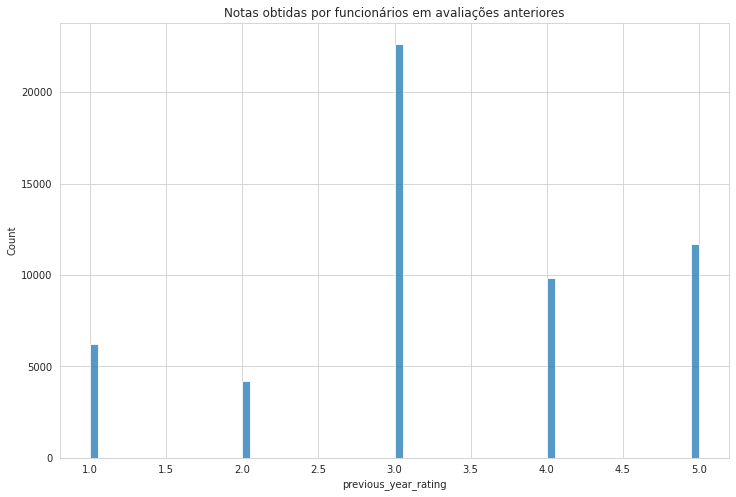

In [47]:
plt.figure (figsize = (12, 8))
sns.histplot(ds['previous_year_rating']).set_title("Notas obtidas por funcionários em avaliações anteriores")

Em grande parte, os funcionários conseguiram uma nota 3/5 na avaliação do ano anterior. Há, ainda, alguns funcionários que conseguiram notas inferiores a esta, ou seja, 1/5 e 2/5, e também há aqueles que conseguiram notas maiores, 4/5 e 5/5. O grupo que conseguiu notas maiores do que a maioria é maior do que o conseguiu notas menores.

In [48]:
ds['avg_training_score'].fillna(ds['avg_training_score'].median(), inplace = True)

Text(0.5, 1.0, 'Nota média obtida pelos funcionários em treinamentos')

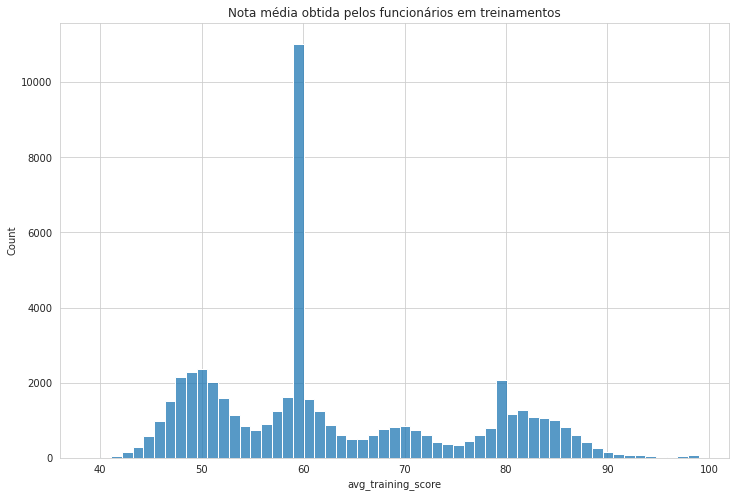

In [49]:
plt.figure(figsize = (12, 8))
sns.histplot(ds['avg_training_score']).set_title("Nota média obtida pelos funcionários em treinamentos")

Assim como ocorreu com a avaliação do ano anterior, podemos ver claramente uma concentração maior de funcionários na região corresponde à metade da escala de notas. Sendo assim, a grande maioria dos funcionários conseguiu tirar uma nota de 60 pontos. Há também os que tiraram uma nota menor que essa e uma nota maior. 

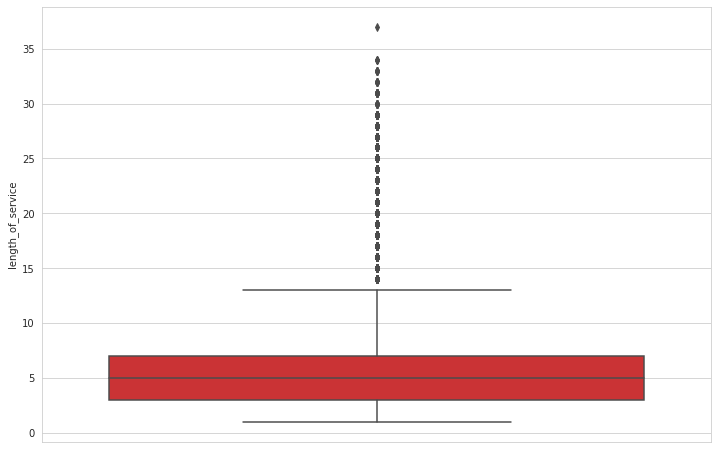

In [50]:
plt.figure(figsize = (12, 8))
sns.boxplot(y = ds['length_of_service'], palette = "Paired_r")

Ao representarmos graficamente o tempo que cada funcionário está na empresa, vemos que a maioria dos funcionários está entre 2 e 15 anos na empresa. No entanto, há alguns funcionários mais veteranos, cujo tempo na empres ultrapassa os 25 anos.

Como podemos perceber por meio dos diversos gráficos acima, as outras features numéricas aparentam estar coerentes. Então, seguiremos para a análise conjunta de features numéricas e categóricas.

#Analisando as features em conjunto
Para compreender melhor as informações contidas no dataset, precisamos analisar as features categóricas em conjunto com as features numéricas, bem como as relações entre as diversas features categóricas e entre as features numéricas.


Text(0.5, 1.0, 'Correlação entre as features')

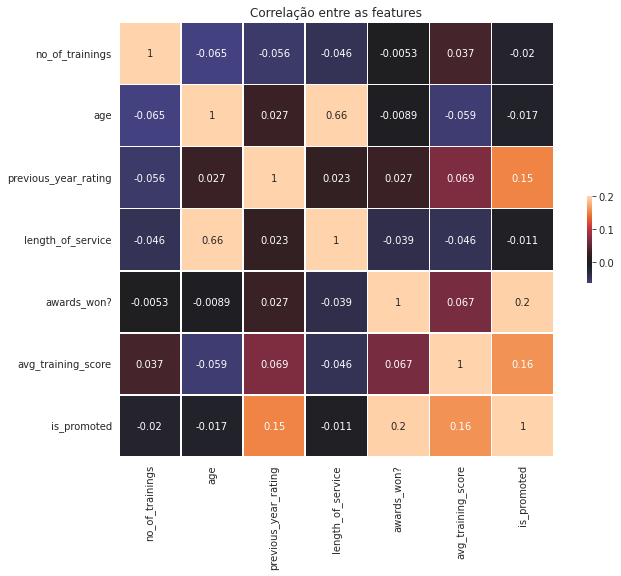

In [51]:
plt.figure(figsize = (12, 8))
sns.heatmap(ds.corr(), vmax = .2, center = 0, square = True, cbar_kws = {'shrink': .2}, linewidth = .5, annot = True).set_title("Correlação entre as features")

Com o heatmap acima, vemos que a nossa target, is_promoted, é mais influenciada pelas features previous_year_rating, awards_won? e avg_training_score.

##Observações com base em idade (age)

Text(0.5, 1.0, 'Representação etária segmentada por gênero do quadro funcional')

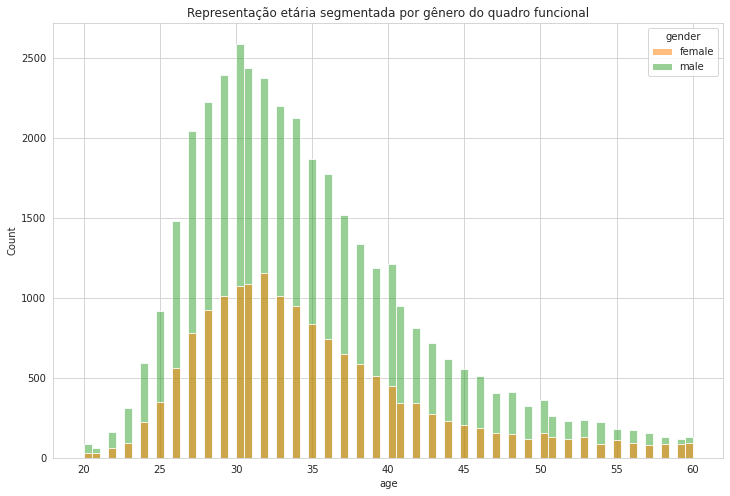

In [52]:
plt.figure(figsize = (12, 8))
f = sns.histplot(x = 'age', hue = 'gender', data = ds, palette = "Paired_r")
f.set_title("Representação etária segmentada por gênero do quadro funcional")

A maioria dos funcionários dessa empresa tem idade entre 27 e 35 anos, tanto para homens quanto para mulheres. Além disso, nota-se também que, com o avançar das idades, a diferença na quantidade de funcionários de cada um dos gêneros tende a diminuir, isto é, em grupos mais velhos, temos uma quantidade mais próxima de homens e mulheres.

Text(0.5, 1.0, 'Relação entre idade e pontuação média em treinamento')

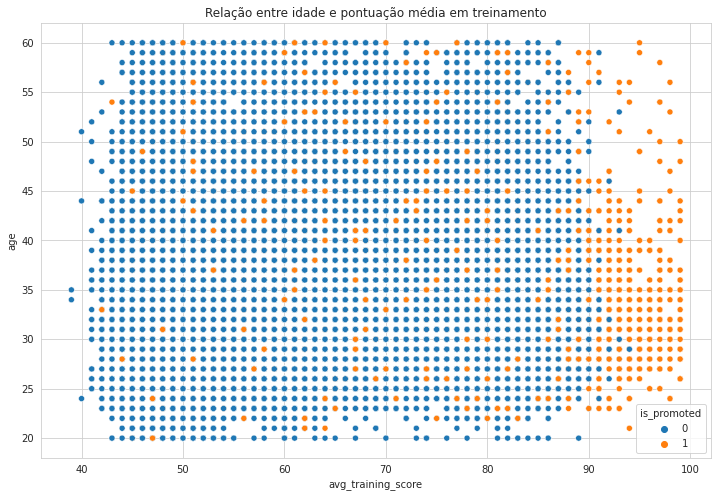

In [53]:
plt.figure(figsize = (12, 8))
f = sns.scatterplot(y = 'age', x = 'avg_training_score', hue = 'is_promoted', data = ds)
f.set_title("Relação entre idade e pontuação média em treinamento")

Quando relacionamos a idade e a média obtida em avaliações anteriores, é possível concluir que a maioria dos funcionários promovidos estão entre idades entre 25 e 40 e conseguiram uma média igual ou superior a 90 pontos na média dos testes.
Vemos ainda que para funcionários com idade superior a 45 anos, o número de promoções é menor. Portanto, a idade pode ser um fator impeditivo para a promoção.

Text(0.5, 1.0, 'Relação entre idade e número de treinamentos')

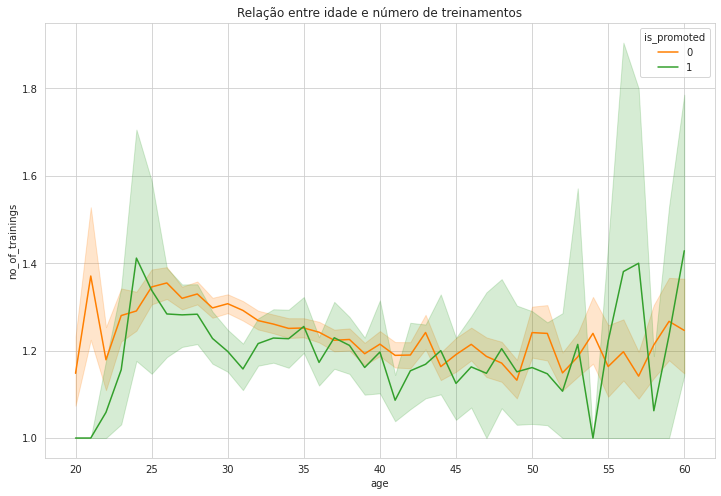

In [54]:
plt.figure(figsize = (12, 8))
f = sns.lineplot(data = ds, y = 'no_of_trainings', x = 'age', hue = 'is_promoted', palette  = "Paired_r")
f.set_title ("Relação entre idade e número de treinamentos")

Analisando o gráfico acima, vemos que o número de treinamentos não é determinante para a promoção de pessoas mais jovens, com idade entre 20 e 45 anos. No entanto, quando olhamos para os funcionários mais idosos, percebe-se que aqueles que foram promovidos, na maioria das vezes, participaram de um número maior de treinamentos. Essa conclusão é razoável, principalmente se os treinamentos servirem, inclusive, para a introdução de novas tecnologias. Sendo esse o caso, é natural que funcionários adaptados para novos cenários possam ser mais valorizados e consequentemente mais promovidos.

##Observações com base em nível educacional (education)
Vamos analisar como a educação influencia na promoção dos funcionários. 

In [55]:
fig = px.histogram(ds, x = 'education', color = 'is_promoted', title = "Número de promoções com base em nível educacional" )
fig.show()

Entre aqueles que tem mestrado ou educação de nível mais aprimorado, aproximidamente 10% foram promovidos, enquanto que 8% dos bacharéis foi promovido, já para aqueles com nível de escolaridade inferior ao ensino médio, o número relativo de promovidos também é de aproximadamente 9%. Esses dados nos informam que, para a promoção, o nível educacional isoladamente não é considerado.

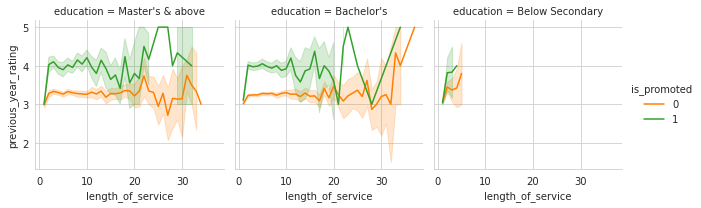

In [56]:
C = sns.FacetGrid(ds, col = 'education', hue = 'is_promoted', palette = "Paired_r")
C.map(sns.lineplot, 'length_of_service', 'previous_year_rating')
C.add_legend()

Quando consideramos o nível educacional em conjunto com a avaliação obtida no ano anterior, a conclusão de que o nível educacional tem pouca ou nenhuma influência para a promoção dos funcionários. Haja visto que, para todos os níveis educacionais, os funcionários promovidos foram aqueles que conseguiram uma nota superior a 3 no ano anterior.

Text(0.5, 1.0, 'Tempo de serviço por nível educacional com foco na forma de contratação')

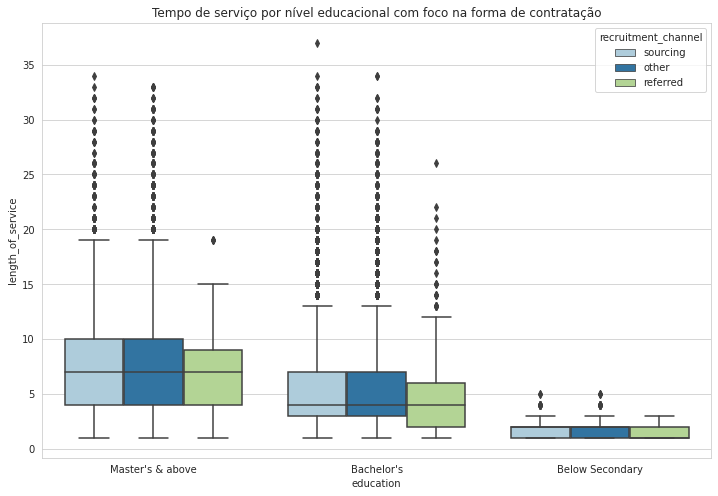

In [57]:
plt.figure(figsize = (12, 8))
f = sns.boxplot(x = 'education', y = 'length_of_service', hue = 'recruitment_channel', data = ds, palette = "Paired")
f.set_title("Tempo de serviço por nível educacional com foco na forma de contratação")

De um modo geral, os funcionários que têm um tempo maior na empresa são aqueles que possuem mestrado ou um ensino de nível ainda mais elevado. Ao passo que os que não completaram o ensino médio são aqueles que passam menos tempo.
Ademais, nota-se claramente que o método de recrutamento dos candidatos tem pouca ou nenhuma influência na decisão de cada funcionário em permanecer por um tempo maior ou não na empresa, isto é, nem mesmo aqueles que foram convidados para trabalhar na empresa ficam por um tempo maior em relação aos funcionários que buscaram a vaga.

##Observações com base em departamento (department)

Text(0.5, 1.0, 'Distribuição de gêneros por departamento')

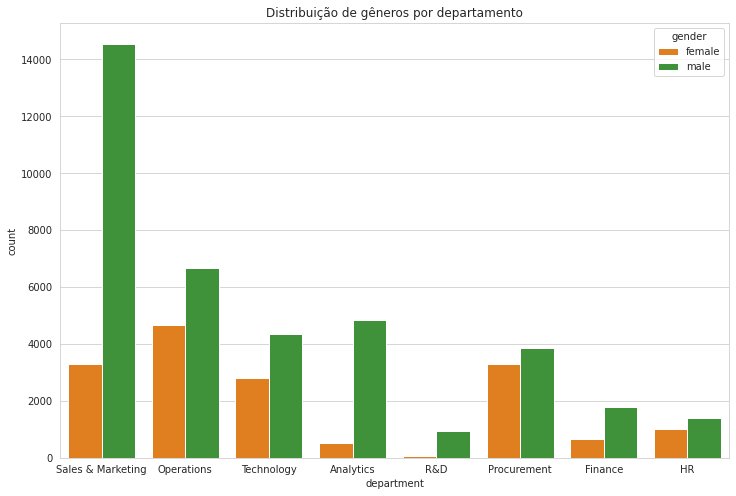

In [58]:
plt.figure(figsize = (12,8))
f = sns.countplot(x = ds['department'], hue = ds['gender'], palette = "Paired_r")
f.set_title ("Distribuição de gêneros por departamento")

Em razão de uma análise anterior, já sabíamos que, entre os funcionários, a maioria é de homens. Esse comportamento também se mantém entre os diversos setores, mas se acentura em Sales & Marketing e Analytics. Por outro lado, notamos uma distribuição um pouco mais equitativa entre os gêneros nos setores de Procurement e HR.

In [59]:
plt.figure(figsize = (12, 8))
px.histogram(ds, x = 'department', color = 'is_promoted', title = "Número de promoções por departmento").show()

<Figure size 864x576 with 0 Axes>

Os funcionários de todos os departamentos têm uma chance bastante parecida de serem promovidos. Entretanto, os funcionários do RH tem uma chance menor de promoção em relação aos demais, apenas 5,6%, ao passo que os funcionários dos setores de tecnologia e análise, com 10,7% e 9,6% respectivamente.

##Observações com base em notas anteriores (previous_year_rating) e média em avaliações (avg_training_score)

Text(0.5, 1.0, 'Avaliação do ano anterior por média dos testes com ênfase em promoção')

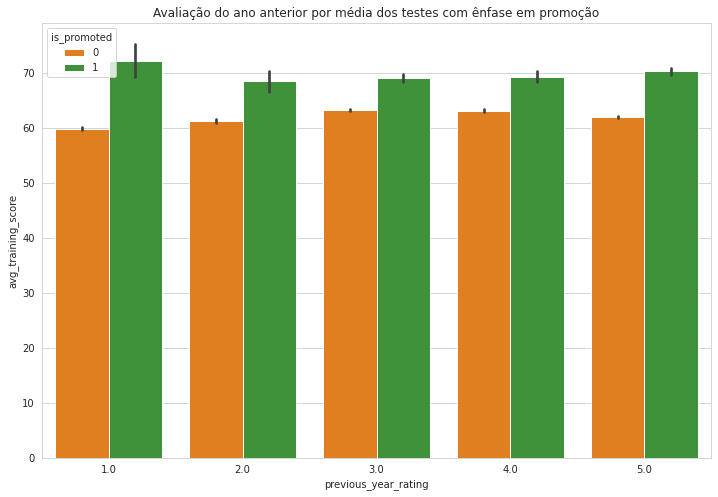

In [60]:
plt.figure(figsize = (12, 8))
f = sns.barplot(x = 'previous_year_rating', y = 'avg_training_score', hue = 'is_promoted', data = ds, palette = "Paired_r")
f.set_title ("Avaliação do ano anterior por média dos testes com ênfase em promoção")

Os funcionários promovidos sempre são aqueles que têm a melhor média em teste. E notamos também que um grande número de funcionários que conseguiram nota no ano anterior igual a 1 e médias altas são promovidos. Talvez pode se tratar de uma maneira de recuperar um bom funcionário que apresentou um desempenho não tão bom no último ano, ou ainda pode tratar-se de novos funcionários que não tinham notas de anos anteriores registradas.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



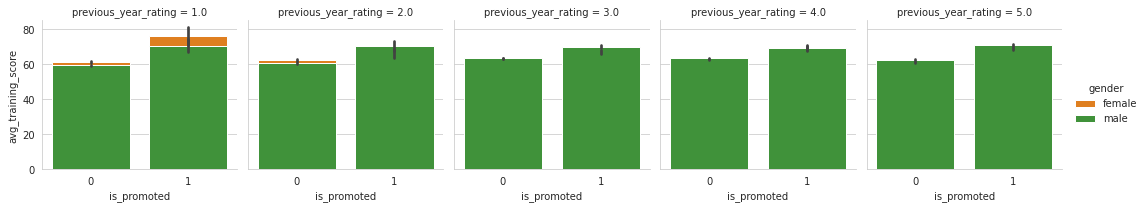

In [61]:
M = sns.FacetGrid(ds, col = 'previous_year_rating', hue = 'gender', palette = 'Paired_r')
M.map(sns.barplot, 'is_promoted' , 'avg_training_score')
#M.fig.suptitle("Média obtida em treinamento por nota anterior com ênfase em promoção\n")
M.add_legend()

A promoção de funcionários com boas médias e pontuação no ano anterior igual a 1 é ainda maior entre as mulheres. Porém, nos demais cenários, a diferença entre os gêneros é mínima, portanto pouco influente.

##Observações com base em tempo de serviço (length_of_service)

Text(0.5, 1.0, 'Tempo de serviço com foco em gênero')

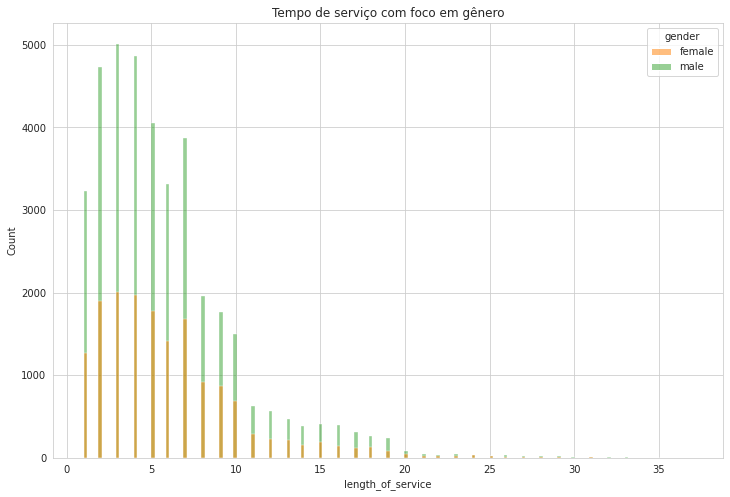

In [62]:
plt.figure(figsize = (12,8))
f = sns.histplot(x = 'length_of_service', hue = 'gender', data = ds, palette = "Paired_r")
f.set_title("Tempo de serviço com foco em gênero")

Text(0.5, 1.0, 'Tempo de serviço entre 20 a 35 anos com foco em gênero')

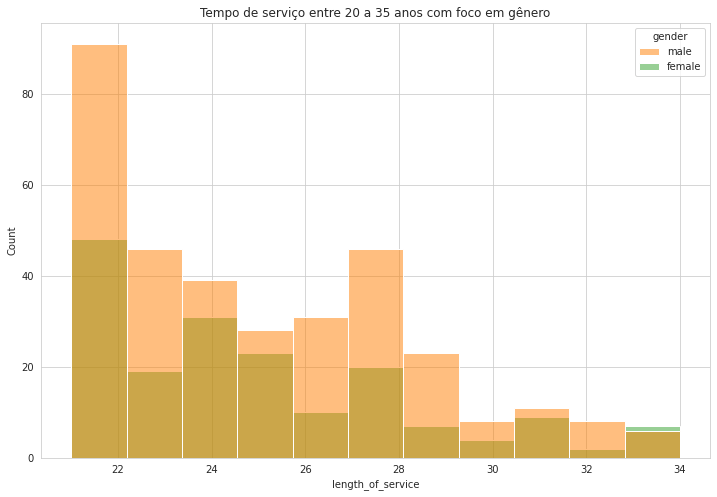

In [63]:
plt.figure(figsize = (12, 8))
dl = ds.query('20 < length_of_service <35')
f = sns.histplot(x = 'length_of_service', hue = 'gender', data = dl, palette = "Paired_r")
f.set_title ("Tempo de serviço entre 20 a 35 anos com foco em gênero")

A observação apontada ao se analisar a distribuição de idades e gênero se mantém ao analisarmos o tempo de trabalho. A disparidade entre homens e mulheres tende a diminuir conforme o tempo de trabalho.

Text(0.5, 1.0, 'Relação entre nota no ano anterior e tempo de serviço, com foco em promoção')

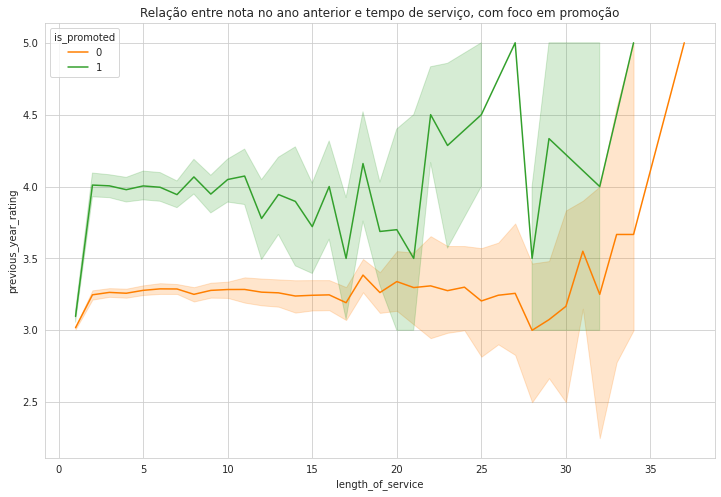

In [64]:
plt.figure(figsize = (12, 8))
f = sns.lineplot(data = ds, y = 'previous_year_rating', x = 'length_of_service', hue = 'is_promoted', palette = "Paired_r")
f.set_title("Relação entre nota no ano anterior e tempo de serviço, com foco em promoção")

Notamos que o tempo que os funcionários levam para alcançar nota máxima na avaliação do ano interior correlaciona-se com a promoção desse mesmo candidato. Aqueles que foram promovidos, começam a alcançar nota máxima a partir dos 25 anos de empresa, enquanto aqueles que não foram promovidos só alcançam essa nota após os 35 anos trabalhando na empresa. Além disso, também é evidente que funcionários que são promovidos tem, ao longo de sua permanência na empresa, notas do ano anterior melhores que aqueles que não são promovidos.

##Observações com base em premiações (awards_won?)

Text(0.5, 1.0, 'Comparação de nota anterior entre funcionários premiados e não premiados')

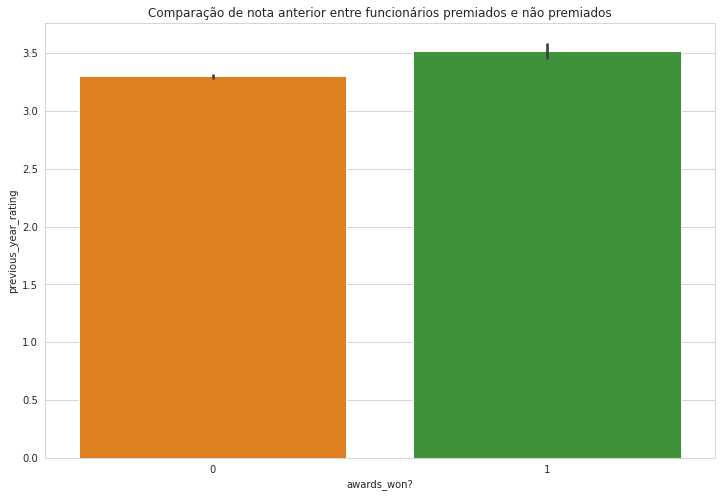

In [65]:
plt.figure(figsize = (12, 8))
f = sns.barplot(data = ds, x = 'awards_won?', y = 'previous_year_rating', palette = "Paired_r")
f.set_title("Comparação de nota anterior entre funcionários premiados e não premiados")

Em geral, funcionários que foram premiados possuem maiores chances de serem promovidos.

Text(0.5, 1.0, 'Comparação de média obtida em treinamentos entre funcionários premiados e não premiados, com ênfase na promoção')

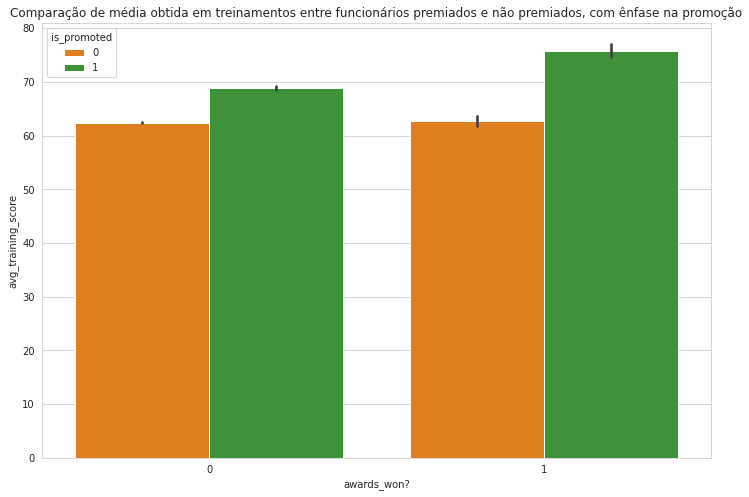

In [66]:
plt.figure(figsize = (12, 8))
f = sns.barplot(x = 'awards_won?', y = 'avg_training_score', hue = 'is_promoted', data = ds, palette = "Paired_r")
f.set_title ("Comparação de média obtida em treinamentos entre funcionários premiados e não premiados, com ênfase na promoção")

Pelo gráfico acima, conseguimos perceber claramente uma relação entre a média em avaliações anteriores e as promoções. Em geral, funcionários promovidos são aqueles que conseguiram maiores notas nas avaliações. Sendo ainda um diferencial receber premiações.

##Observações com base em gênero (gender)

In [67]:
plt.figure(figsize = (20, 15))
px.histogram(ds, x = 'is_promoted', color = 'gender', title = "Número absoluto de promoções por gênero").update_layout(bargap = 0.1)

<Figure size 1440x1080 with 0 Axes>

Embora as informações de gênero já tenham sido abordadas nos tópicos anteriores, quando analisamos exclusivamente a influência do gênero nas promoções, podemos notar que aproximidamente 8% dos homens são promovidos, enquanto que 9% das mulheres sobem de cargo, ou seja, o gênero exclusivamente tem influência baixa ou nula para a definição sobre a promoção de um funcionário.

#Conclusão da análise
Ao analisarmos cada uma das features do dataset, pudemos notar quais delas tem ou não influencia na promoção de cada funcionário. A feature education surpreendente não tem influência alguma sobre a promoção de cada funcionário. Pelo menos não exclusivamente. Conforme foi analisado, um funcionário com mestrado tem as mesmas chances de ser promovido que um funcionário apenas com bacharelado. Outra feature que tem pouquíssima ou nenhuma influência é o gênero. Embora o número de funcionários homens seja bem maior do que o de mulheres na empresa em geral, a taxa de promoção se mantém igual para ambos os gêneros. 
Entende-se que a média obtida durante os treinamentos tem bastante influência na promoção de cada pessoa. Pessoas que obtiveram médias maiores, têm mais chances de serem promovidas que aquelas que não tiveram. Esse mesmo comportamento é visto quando se analisa a pontuação obtida no ano anterior e os prêmios ganhos — sendo que os funcionários que receberam alguma premiação e tiveram melhores médias e pontuações são os que tem as maiores chances de receberem uma promoção. 
A idade, por sua vez, também é um fator de influência relevante na promoção de cada funcionário. Notou-se que funcionários mais velhos têm mais dificuldade de promoção que aqueles mais novos. Funcionários entre 20 e 45 anos são aqueles que têm maiores chances de promoção. 
Para os funcionários mais novos, o número de treinamentos tem pouco ou nenhum impacto na promoção. Porém, para funcionários com mais idade, percebe-se que, quanto maior o número de treinamentos, maiores são as chances de se receber uma promoção.
Em relação aos departamentos, vê-se alguma influência para a feature target. Funcionários do setor de RH são aqueles com menores chances de receber uma promoção, ao passo que funcionários dos setores de tecnologia e análise são aqueles com maiores chances.

#Estabelecendo modelos de predição

Antes de criarmos o nosso modelo, é interessante vermos como está o dataset de teste e limpá-lo, caso seja necessário.

In [68]:
dt = pd.read_csv('/content/drive/MyDrive/Turing/1º Projeto - TurinGucci/test.csv')
dt.set_index('employee_id', inplace = True)

In [69]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       21417 non-null  float64
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   awards_won?           23490 non-null  int64  
 10  avg_training_score    23490 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.2+ MB


O dataset de treino apresenta alguns dados faltantes nas features education, no_of_trainings e previous_year_rating.
Vamos observar primeiro as features categóricas e, em seguida, as features numéricas.

In [70]:
dt.head().T

employee_id,8724,74430,72255,38562,64486
department,Technology,HR,Sales & Marketing,Procurement,Finance
region,region_26,region_4,region_13,region_2,region_29
education,Bachelor's,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,m,f,m,f,m
recruitment_channel,sourcing,other,other,other,sourcing
no_of_trainings,1.0,1.0,1.0,NaN,1.0
age,24,31,31,31,30
previous_year_rating,NaN,3.0,1.0,2.0,4.0
length_of_service,1,5,4,9,7
awards_won?,0,0,0,0,0


##Analisando e corrigindo dados categóricos

In [71]:
dt.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,23490,23490,22456,23490,23490
unique,10,35,3,4,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7315,5299,15578,15222,13078


In [72]:
print('DEPARTMENT unique column values: ')
print(pd.Series(dt.department.unique()), end = '\n----')

DEPARTMENT unique column values: 
0            Technology
1                    HR
2     Sales & Marketing
3           Procurement
4               Finance
5             Analytics
6            Operations
7                 Legal
8                   R&D
9    quem trouxe quenga
dtype: object
----

In [73]:
print('REGION unique column values: ')
print(pd.Series(ds.region.unique()), end = '\n----')

REGION unique column values: 
0      region_7
1     region_22
2     region_19
3     region_23
4     region_26
5      region_2
6     region_20
7     region_34
8      region_1
9      region_4
10    region_29
11    region_31
12    region_15
13    region_14
14    region_11
15     region_5
16    region_28
17    region_17
18    region_13
19    region_16
20    region_25
21    region_10
22    region_27
23    region_30
24    region_12
25    region_21
26     region_8
27    region_32
28     region_6
29    region_33
30    region_24
31     region_3
32     region_9
33    region_18
dtype: object
----

In [74]:
print ('EDUCATION unique column values: ')
print(pd.Series(dt.education.unique()), end = '\n----')

EDUCATION unique column values: 
0          Bachelor's
1    Master's & above
2                 NaN
3     Below Secondary
dtype: object
----

In [75]:
print ('GENDER unique column values: ')
print (pd.Series(dt.gender.unique()), end = '\n----')

GENDER unique column values: 
0         m
1         f
2      MALE
3    fEMALE
dtype: object
----

In [76]:
print('RECRUITMENT_CHANNEL unique columns values: ')
print(pd.Series(dt.recruitment_channel.unique()), end = '\n----')

RECRUITMENT_CHANNEL unique columns values: 
0    sourcing
1       other
2    referred
dtype: object
----

Entre os dados categóricos, aqueles que aparentam ter problemas são apenas as fetures gender e education. Em gender, há o mesmo tipo de redundância que havia nos dados no dataset de treino, e em education há alguns dados faltantes.

In [77]:
dt['gender'].replace('m', 'male', inplace = True)
dt['gender'].replace('MALE', 'male', inplace = True)
dt['gender'].replace('f', 'female', inplace = True)
dt['gender'].replace('fEMALE', 'female', inplace = True)

In [78]:
print('GENDER unique column values: ')
print(pd.Series(dt.gender.unique()), end = '\n----')

GENDER unique column values: 
0      male
1    female
dtype: object
----

In [79]:
print(dt['education'].isna().sum())


1034


In [80]:
dt['education'].fillna(dt['education'].mode()[0], inplace = True)

In [81]:
print('EDUCATION column unique values: ')
print(pd.Series(dt.education.unique()), end = '\n----')

EDUCATION column unique values: 
0          Bachelor's
1    Master's & above
2     Below Secondary
dtype: object
----

In [82]:
print(len(dt[dt['department'] == 'quem trouxe quenga']))

7


In [83]:
print(len(dt[dt['department'] == 'Legal']))

438


Como a quantidade de dados incoerentes em departamentos é pouco expressiva, vamos excluir esses dados sem grandes prejuízos.

In [84]:
dt.drop(dt[dt['department']=="quem trouxe quenga"].index, inplace = True)

In [85]:
dt.drop(dt[dt['department'] == 'Legal'].index, inplace = True)

In [86]:
dt['department'].unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'R&D'], dtype=object)

In [87]:
print(dt.isna().sum())

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings         2049
age                        0
previous_year_rating    1752
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64


##Analisando e corrigindo dados numéricos

In [88]:
dt.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,20996.000000,23045.000000,21293.000000,23045.000000,23045.000000,23045.000000
mean,1.260669,34.802170,3.337059,5.833717,0.022912,63.334346
std,0.608206,7.683945,1.262695,4.217439,0.149625,13.521950
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [89]:
print('NO_OF_TRAININGS unique column values: ')
print(pd.Series(dt['no_of_trainings'].unique()), end = '\n----')

NO_OF_TRAININGS unique column values: 
0    1.0
1    NaN
2    2.0
3    4.0
4    3.0
5    5.0
6    7.0
7    6.0
8    8.0
9    9.0
dtype: float64
----

In [90]:
dt['no_of_trainings'].fillna(dt['no_of_trainings'].mode()[0], inplace = True)

In [91]:
print(dt['no_of_trainings'].isna().sum())

0


In [92]:
print('AGE unique column values: ')
print(pd.Series(dt['age'].unique()), end = '\n----')

AGE unique column values: 
0     24
1     31
2     30
3     36
4     33
5     51
6     29
7     40
8     34
9     37
10    26
11    49
12    27
13    25
14    41
15    52
16    43
17    35
18    42
19    57
20    46
21    21
22    32
23    38
24    23
25    28
26    58
27    54
28    44
29    48
30    45
31    39
32    59
33    53
34    56
35    47
36    22
37    20
38    50
39    55
40    60
dtype: int64
----

In [93]:
print('PREVIOUS_YEAR_RATING column unique values: ')
print(pd.Series(dt['previous_year_rating'].unique()), end = '\n----')

PREVIOUS_YEAR_RATING column unique values: 
0    NaN
1    3.0
2    1.0
3    2.0
4    4.0
5    5.0
dtype: float64
----

In [94]:
dt['previous_year_rating'].fillna(dt['previous_year_rating'].median(), inplace = True)

In [95]:
print(dt['previous_year_rating'].isna().sum())

0


In [96]:
print('NaN quantity of LENGTH_OF_SERVICE: ', dt['length_of_service'].isna().sum())

NaN quantity of LENGTH_OF_SERVICE:  0


In [97]:
print('quantity of NaN values in AWARDS_WON? column: ', dt['awards_won?'].isna().sum())

quantity of NaN values in AWARDS_WON? column:  0


In [98]:
print('quantity of NaN values in AVG_TRAINING_SCORE: ', dt['avg_training_score'].isna().sum())

quantity of NaN values in AVG_TRAINING_SCORE:  0


Agora que todas as incoerências encontradas no dataset foram corrigidas, vamos escolher o modelo de predição que mais se adeque às nossas necessidades.

##Adaptando os dados

Antes de escolher um modelo específico, vamos separar o dataset em dados de treino e teste e estabelecer algumas variáveis dummy para as features categóricas.

Como concluimos pela análise, algumas variáveis não precisam ser consideradas pelos modelos, afinal não causam efeito algum no resultado. Por isso, essas features serão retiradas do dataset de treino.

In [99]:
x = ds.drop(columns = ['region','education', 'recruitment_channel', 'length_of_service', 'is_promoted'])
y = ds['is_promoted']

encoding_cat_num = pd.get_dummies(x)
encoding_cat_num

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_female,gender_male
employee_id,,,,,,,,,,,,,,,
65438,1.0,35,5.0,0,49.0,0,0,0,0,0,0,1,0,1,0
65141,1.0,30,5.0,0,60.0,0,0,0,1,0,0,0,0,0,1
7513,1.0,34,3.0,0,50.0,0,0,0,0,0,0,1,0,0,1
2542,2.0,39,1.0,0,50.0,0,0,0,0,0,0,1,0,0,1
48945,1.0,45,3.0,0,73.0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,1.0,48,3.0,0,60.0,0,0,0,0,0,0,0,1,0,1
74592,1.0,37,2.0,0,56.0,0,0,0,1,0,0,0,0,1,0
13918,1.0,27,5.0,0,79.0,1,0,0,0,0,0,0,0,0,1


In [100]:
encoding_cat_num.drop(columns = ['gender_male'], inplace = True)

Faremos o mesmo com os dados nos quais aplicaremos o modelo escolhido:

In [101]:
X_linha = dt.drop(columns = ['region', 'education', 'length_of_service', 'recruitment_channel'])

enconding_xlinha = pd.get_dummies(X_linha)
enconding_xlinha

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_female,gender_male
employee_id,,,,,,,,,,,,,,,
8724,1.0,24,3.0,0,77,0,0,0,0,0,0,0,1,0,1
74430,1.0,31,3.0,0,51,0,0,1,0,0,0,0,0,1,0
72255,1.0,31,1.0,0,47,0,0,0,0,0,0,1,0,0,1
38562,1.0,31,2.0,0,65,0,0,0,0,1,0,0,0,1,0
64486,1.0,30,4.0,0,61,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47537,1.0,28,4.0,0,51,0,0,0,0,0,0,1,0,0,1
25600,1.0,31,3.0,0,74,0,0,0,0,0,0,0,1,0,1
45409,1.0,26,4.0,0,50,0,0,1,0,0,0,0,0,1,0


Ao converter os dados categóricos para numéricos, geramos duas features que tratam basicamente da mesma informação, as features "gender_male" e "gender_female", por isso uma delas será excluída.

In [102]:
enconding_xlinha.drop(columns  = ['gender_male'], inplace = True)

Agora vamos separar o dataset de treino em treino e teste

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(encoding_cat_num, y, random_state = 0, test_size = 0.35)

##Plotando modelos


Para avaliar cada um dos modelos, usaremos a acurácia, a matriz de confusão e a curva ROC como parâmetros

In [105]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_roc_curve

###Regressão Logística

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [108]:
y_train_predict = LR.predict(x_train)
y_test_predict = LR.predict(x_test)
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_predict)}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_test_predict)}')

Acurácia no treino: 0.9258477557337836
Acurácia no teste: 0.9245361902273321


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Regressão Logística')

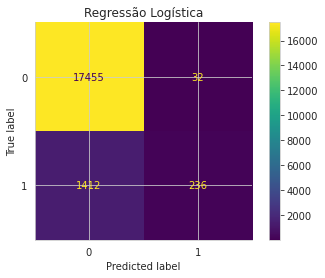

In [109]:
plot_confusion_matrix(LR, x_test, y_test, values_format = 'd', ax = None)
plt.title ('Regressão Logística')

In [110]:
print ("Regressão Logítica")
print(classification_report(y_test, y_test_predict))

Regressão Logítica
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17487
           1       0.88      0.14      0.25      1648

    accuracy                           0.92     19135
   macro avg       0.90      0.57      0.60     19135
weighted avg       0.92      0.92      0.90     19135



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



	Curva ROC — Regressão Logística


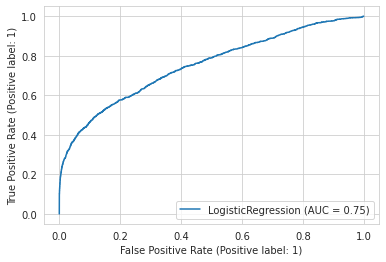

In [111]:
plot_roc_curve(LR, x_test, y_test)
print("\tCurva ROC — Regressão Logística")

###Random Forest


In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth = 54 ,
    n_estimators = 200,
    min_samples_split = 52,
    criterion = 'entropy',
    oob_score = True,
    random_state = 42
)

In [113]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=54, min_samples_split=52,
                       n_estimators=200, oob_score=True, random_state=42)

In [114]:
yrf_train = rf.predict(x_train)
yrf_test = rf.predict (x_test)

print(f'Acurácia no treino: {accuracy_score(y_train, yrf_train)}')
print(f'Acurácia no teste: {accuracy_score(y_test, yrf_test)}')

Acurácia no treino: 0.9360630364429435
Acurácia no teste: 0.9331591324797491


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Random Forest')

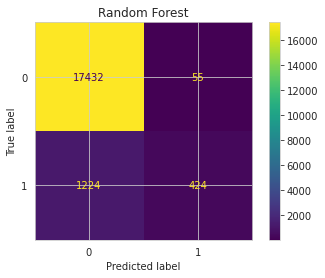

In [115]:
plot_confusion_matrix(rf, x_test, y_test, values_format = 'd')
plt.title ('Random Forest')

In [116]:
print('Random Forest: ')
print(classification_report(y_test, yrf_test))

Random Forest: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17487
           1       0.89      0.26      0.40      1648

    accuracy                           0.93     19135
   macro avg       0.91      0.63      0.68     19135
weighted avg       0.93      0.93      0.92     19135



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



	Curva ROC — Random Forest


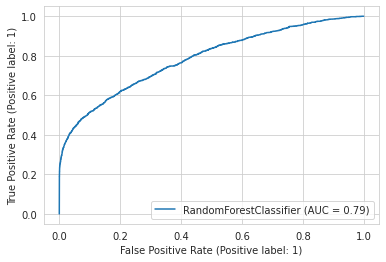

In [117]:
plot_roc_curve(rf, x_test, y_test)
print("\tCurva ROC — Random Forest")

###KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score




best_classifier = None
best_score = 0.0
best_k = 0
k_range = [2, 4, 6, 8, 10, 12, 14]

for k in k_range:
    knn = KNeighborsClassifier(k)
    score = np.mean(cross_val_score(knn, x_train, y_train, cv = 10))
    
    print(f"Finished for K = {k} | Score: {score:.4f}")
    if score > best_score:
        best_k = k
        best_score = score
        best_classifier = knn

print("========================================")
print(f"Best acc: {best_score:.4f} | K = {best_k}")

Finished for K = 2 | Score: 0.9211
Finished for K = 4 | Score: 0.9232
Finished for K = 6 | Score: 0.9229
Finished for K = 8 | Score: 0.9229
Finished for K = 10 | Score: 0.9229
Finished for K = 12 | Score: 0.9227
Finished for K = 14 | Score: 0.9228
Best acc: 0.9232 | K = 4


In [119]:
knn = KNeighborsClassifier(4)
knn.fit(x_train, y_train)


y_knn_train = knn.predict(x_train)
y_knn_test = knn.predict(x_test)

print(f'Acurácia no treino: {accuracy_score(y_train, y_knn_train)}')
print(f'Acurácia no teste: {accuracy_score(y_test, y_knn_test)}')

Acurácia no treino: 0.9282116223441678
Acurácia no teste: 0.9229161222889992


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'KNN = 4')

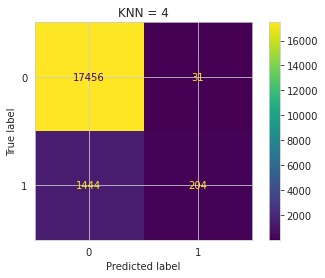

In [120]:
plot_confusion_matrix(knn, x_test, y_test, values_format = 'd')
plt.title ('KNN = 4')

In [121]:
print("KNN = 4: ")
print(classification_report(y_test, y_knn_test))

KNN = 4: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     17487
           1       0.87      0.12      0.22      1648

    accuracy                           0.92     19135
   macro avg       0.90      0.56      0.59     19135
weighted avg       0.92      0.92      0.90     19135



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



	Curva ROC — KNN = 4:


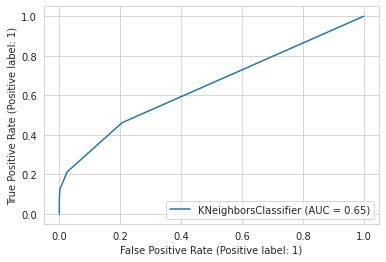

In [122]:
plot_roc_curve(knn, x_test, y_test)
print('\tCurva ROC — KNN = 4:')

###Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
ynb_predict = NB.predict(x_test)

print(accuracy_score(y_test, ynb_predict))

0.9125685915860988


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'Naive Bayes')

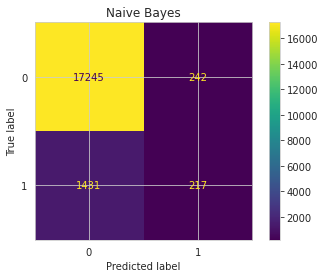

In [124]:
plot_confusion_matrix(NB, x_test, y_test, values_format= 'd')
plt.title ("Naive Bayes")

In [125]:
print('Naive Bayes: ')
print(classification_report(y_test, ynb_predict))

Naive Bayes: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17487
           1       0.47      0.13      0.21      1648

    accuracy                           0.91     19135
   macro avg       0.70      0.56      0.58     19135
weighted avg       0.88      0.91      0.89     19135



	Curva ROC — Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



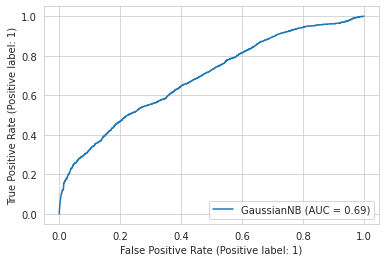

In [126]:
plot_roc_curve (NB, x_test, y_test)
print("\tCurva ROC — Naive Bayes")

###SVM

In [127]:
from sklearn import svm
# Instanciação do classificador: Support Vector Classifier
# Parametro C define a regularização, quanto maior mais rigida sera a margem 
SVM = svm.SVC(C = 1E3)
SVM.fit(x_train, y_train)
y_svm_predict = SVM.predict(x_test)

print(accuracy_score(y_test, y_svm_predict))

0.9249020120198589


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'SVM')

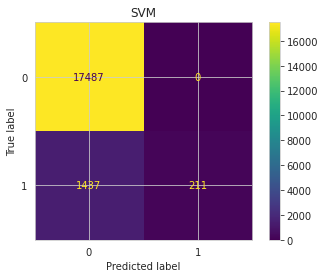

In [128]:
plot_confusion_matrix(SVM, x_test, y_test, values_format = 'd')
plt.title ('SVM')

In [129]:
print('SVM: ')
print(classification_report(y_test, y_svm_predict))

SVM: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     17487
           1       1.00      0.13      0.23      1648

    accuracy                           0.92     19135
   macro avg       0.96      0.56      0.59     19135
weighted avg       0.93      0.92      0.90     19135



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



	Curva ROC — SVM


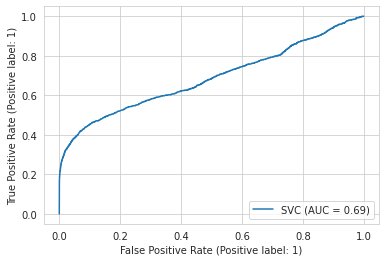

In [130]:
plot_roc_curve(SVM, x_test, y_test)
print("\tCurva ROC — SVM")

#Conclusão
Ao avaliarmos os 5 algoritmos preditivos instanciados, percebemos que todos têm uma acurácia bastante parecida, sendo que o algoritmo de Random Forest é o que apresenta o maior valor (0,936), e o de Naive Bayes, o menor (0,912) e uma grande quantidade de falsos negativos.

Além disso, com uma análise um pouco mais minuciosa, lançando mão da matriz de confusão e de índices tais como recall, precisão, e a curva de ROC, vemos que o algoritmo de Random Forest também é aquele que conseguiu acertar o maior número de positivos em testes e treino, apresentando o maior recall, o maior f1-score e a maior pontuação na curva ROC. Sendo, portanto, o modelo mais equilibrado em relação aos demais.

Vamos, por fim, aplicar o modelo do Random Forest no dataset a respeito do qual deseja-se realizar as predições:

In [131]:
y_is_promoted = rf.predict(enconding_xlinha)

dt['is_promoted'] = y_is_promoted

dt.head().T

employee_id,8724,74430,72255,38562,64486
department,Technology,HR,Sales & Marketing,Procurement,Finance
region,region_26,region_4,region_13,region_2,region_29
education,Bachelor's,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,male,female,male,female,male
recruitment_channel,sourcing,other,other,other,sourcing
no_of_trainings,1.0,1.0,1.0,1.0,1.0
age,24,31,31,31,30
previous_year_rating,3.0,3.0,1.0,2.0,4.0
length_of_service,1,5,4,9,7
awards_won?,0,0,0,0,0


In [132]:
dt.to_csv(r'/content/drive/MyDrive/Turing/1º Projeto - TurinGucci/Resultado.csv')